In [13]:
import pandas as pd
import os
from nltk import sent_tokenize, word_tokenize
from nltk.cluster.util import cosine_distance
import re
import re
import numpy as np
from operator import itemgetter
from sklearn.metrics.pairwise import cosine_similarity
    
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import string
import spacy
from nltk.corpus import wordnet
from rouge_score import rouge_scorer
import pickle
import nltk
nltk.download('averaged_perceptron_tagger')

In [14]:
df__ = pd.read_csv('df_summary_12000__final2_nx.csv', encoding = 'utf-8', escapechar='\\', index_col=0)

In [15]:
df__

,article,summary_gt,summary_gt_list,summary
0,Its official: US President Barack Obama wants ...,Syrian official: Obama climbed to the top of t...,['Syrian official: Obama climbed to the top of...,Its official : US President Barack Obama wants...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,['Usain Bolt wins third gold of world champion...,CNN Usain Bolt rounded off the world champions...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agencys Kansas City office is ...,['The employee in agencys Kansas City office i...,"The Kansas City employee , who started his job..."
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,['NEW: A Canadian doctor says she was part of ...,"Burkhart , a 24 year old German national , has..."
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,['Another arrest made in gang rape outside Cal...,"CNN Police arrested another teen Thursday , th..."
...,...,...,...,...
11995,(CNN) -- A fugitive fired a shot at bounty hun...,"Duane ""Dog"" Chapman says he, local bondsman we...","['Duane ""Dog"" Chapman says he, local bondsman ...","Duane Dog '' Chapman , shown in Hawaii this mo..."
11996,Atlanta (CNN) -- A woman without hope when the...,"""We will be eternally grateful every minute of...","['""We will be eternally grateful every minute ...",Nash said she didnt know why her estranged hus...
11997,Los Angeles (CNN) -- A third person was charge...,"Dorothy Grace Marie Maraglino, 36, pleads not ...","['Dorothy Grace Marie Maraglino, 36, pleads no...",Los Angeles CNN A third person was charged wit...
11998,(CNN) -- Formula One team Williams has announc...,Williams team profits rise from $2.07 million ...,['Williams team profits rise from $2.07 millio...,CNN Formula One team Williams has announced an...


In [ ]:
stop = stopwords.words('english')
stop = set(stop)
stop.add('"')
stop.add("'")
stop = list(stop)
lemmatizer = WordNetLemmatizer()
def preprocess (sentence):
    tokens = word_tokenize(sentence)
    s1 = [i.lower() for i in tokens if not i.lower() in stop]
    s1 = [i for i in s1 if i not in string.punctuation]
    s1 = [lemmatizer.lemmatize(i) for i in s1]
    s1 = ' '.join(map(str, s1))
    s1 = s1.replace("'",'')
    return s1

In [ ]:
list_pos_tag = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

#add synonyms to words with POS tag listed before
def add_synonims (sentence1):
    
    sent_tok = word_tokenize(sentence1)
    s1_pos = nltk.pos_tag(sent_tok)

    for w in range(len(sent_tok)):  
        w_pos = s1_pos[w][1]
        if w_pos in list_pos_tag:
            for syn in wordnet.synsets(sent_tok[w]):
                for l in syn.lemmas():
                    if l.name() not in sent_tok:
                        sent_tok.append(l.name())

    s1_to_string = ' '.join(sent_tok)
    return s1_to_string

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1'], use_stemmer=True)

#add rouge-1 to dataframe
def add_rouge (dataframe):

    score_list = []
    for i in range(len(dataframe)):
        print(i)
        summ = dataframe.iloc[i,3]
        summ = add_synonims(summ)
        summ = preprocess(summ)

        ref = dataframe.iloc[i,1]
        ref = preprocess(ref)

        scores = scorer.score(summ, ref)
        rouge_score = scores['rouge1'].precision
        score_list.append(rouge_score)

    dataframe['rouge'] = score_list
    return dataframe

In [ ]:
d= add_rouge(df__)
with open('df_summ_rouge_12000_2_nx.pickle', 'wb') as handle:
    pickle.dump(d,handle)

In [1]:
#with open('df_summ_rouge_12000_2_nx.pickle', 'rb') as handle:
#    df__ = pickle.load(handle)

In [2]:
df__.head()

,article,summary_gt,summary_gt_list,summary,rouge
0,Its official: US President Barack Obama wants ...,Syrian official: Obama climbed to the top of t...,['Syrian official: Obama climbed to the top of...,Its official : US President Barack Obama wants...,0.451613
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,['Usain Bolt wins third gold of world champion...,CNN Usain Bolt rounded off the world champions...,0.904762
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agencys Kansas City office is ...,['The employee in agencys Kansas City office i...,"The Kansas City employee , who started his job...",0.400000
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,['NEW: A Canadian doctor says she was part of ...,"Burkhart , a 24 year old German national , has...",0.432432
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,['Another arrest made in gang rape outside Cal...,"CNN Police arrested another teen Thursday , th...",0.423077


In [5]:
df__.sort_values(by='rouge').head(20)

,article,summary_gt,summary_gt_list,summary,rouge
11200,,Nina Persson is known for her touching vocals ...,['Nina Persson is known for her touching vocal...,---,0.000000
2713,,From what Asian nation did McCain adopt a daug...,['From what Asian nation did McCain adopt a da...,---,0.000000
9613,,"On Memorial Day, we remember those who lost th...","['On Memorial Day, we remember those who lost ...",---,0.000000
7813,,Riyo Mori was crowned Miss Universe in Mexico ...,['Riyo Mori was crowned Miss Universe in Mexic...,---,0.000000
8399,,CNN.com will feature iReporter photos in a wee...,['CNN.com will feature iReporter photos in a w...,---,0.000000
8652,,CNN.com will feature iReporter photos in a wee...,['CNN.com will feature iReporter photos in a w...,---,0.000000
11577,,"In August 1969, members of Charles Mansons ""fa...","['In August 1969, members of Charles Mansons ""...",---,0.000000
6378,,"Shriver is sister of President Kennedy, Bobby ...","['Shriver is sister of President Kennedy, Bobb...",---,0.000000
9421,,"Whether its acting or directing, the Coppola c...","['Whether its acting or directing, the Coppola...",---,0.000000
9227,,Quincy Jones has been nominated for 76 Grammy ...,['Quincy Jones has been nominated for 76 Gramm...,---,0.000000


In [8]:
def is_blank(string):
    """
    Returns `True` if string contains only white-space characters
    or is empty. Otherwise `False` is returned.
    """
    return not string or string.isspace()
is_blank('  ')

True

In [9]:
#remove empty articles
blank = df__['article'].apply(lambda x: is_blank(x))
df__2 = df__.loc[-blank,]
len(df__2)

11985

<AxesSubplot:>

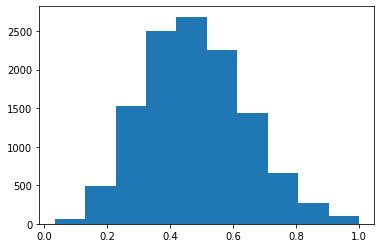

In [10]:
df__2['rouge'].hist(grid=False)

In [11]:
df__2['rouge'].mean()

0.48028944068783

In [30]:
with open('df_summ_rouge_12000_noblank_2_nx.pickle', 'wb') as handle:
    pickle.dump(df__2, handle)

In [16]:
sorted_df__desc = df__2.sort_values(by=['rouge'], ascending=False).head(50)
sorted_df__desc

,article,summary_gt,summary_gt_list,summary,rouge
4554,"Srinagar, India (CNN) -- A soldier at an army ...",A soldier opens fire with an automatic rifle i...,['A soldier opens fire with an automatic rifle...,"Srinagar , India CNN A soldier at an army camp...",1.000000
11191,(CNN Student News) -- Students will learn abou...,Students will learn about political parties in...,['Students will learn about political parties ...,CNN Student News Students will learn about pol...,1.000000
2958,(CNN) -- A 15-year-old student shot and killed...,"A school shooting happens in Viljandi, Estonia...","['A school shooting happens in Viljandi, Eston...",CNN A 15 year old student shot and killed a te...,1.000000
10631,(CNN)A volcano in Russia led to the cancellati...,Volcano shoots ash into the atmosphere some 30...,['Volcano shoots ash into the atmosphere some ...,CNN A volcano in Russia led to the cancellatio...,1.000000
1373,(CNN) -- Three crew members aboard a US Navy h...,Three crew members were found in stable condit...,['Three crew members were found in stable cond...,CNN Three crew members aboard a US Navy helico...,1.000000
5061,(CNN) -- Open Road Films will release its Stev...,The Steve Jobs biopic will be released August ...,['The Steve Jobs biopic will be released Augus...,CNN Open Road Films will release its Steve Job...,1.000000
10116,(CNN) -- A sex tape allegedly showing former S...,Tape was the subject of a February hearing at ...,['Tape was the subject of a February hearing a...,CNN A sex tape allegedly showing former Sen. J...,1.000000
7947,New Delhi (CNN) -- Ending years of speculation...,Tata Sons is an $80 billion conglomerate . ...,"['Tata Sons is an $80 billion conglomerate', '...",New Delhi CNN Ending years of speculation over...,1.000000
4074,(CNN) -- Singer Marc Anthony filed divorce pap...,Marc Anthony files divorce papers in Los Angel...,['Marc Anthony files divorce papers in Los Ang...,CNN Singer Marc Anthony filed divorce papers W...,1.000000
8958,-- Hayden Panettiere picks up the mic droppe...,Red teams up with her Granny to look into the ...,['Red teams up with her Granny to look into th...,Hayden Panettiere picks up the mic dropped by ...,1.000000
